# Decision Trees and Random Forests in Python

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('C:/Users/azade/Documents/05 - Datasets//kyphosis.csv')

In [4]:
df.head()

,Unnamed: 0,Kyphosis,Age,Number,Start
0,1,absent,71,3,5
1,2,absent,158,3,14
2,3,present,128,4,5
3,4,absent,2,5,1
4,5,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  81 non-null     int64 
 1   Kyphosis    81 non-null     object
 2   Age         81 non-null     int64 
 3   Number      81 non-null     int64 
 4   Start       81 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.3+ KB


## EDA

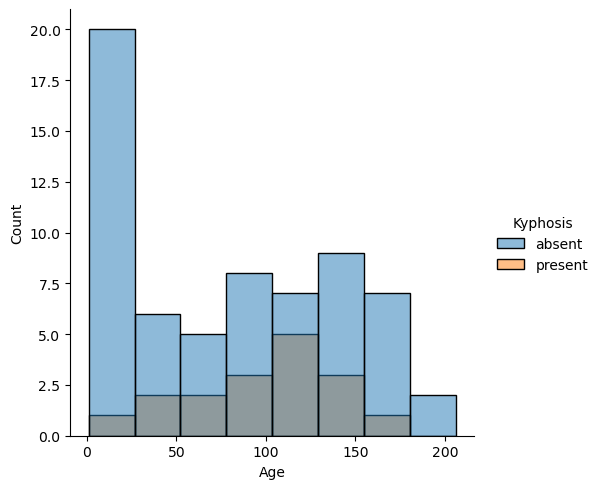

In [6]:
sns.displot(x=df['Age'],hue=df['Kyphosis'])

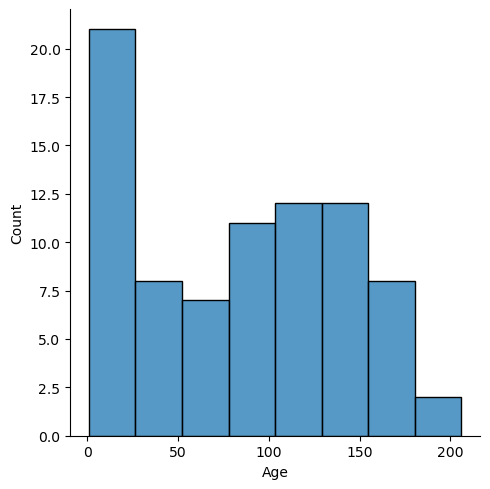

In [7]:
sns.displot(x=df['Age'])

In [8]:
present=df[df['Kyphosis']=='present']

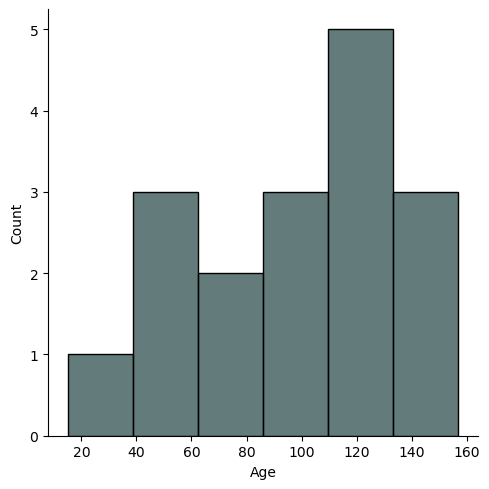

In [9]:
sns.displot(present['Age'],color='DarkSlateGrey')

In [10]:
absent=df[df['Kyphosis']=='absent']

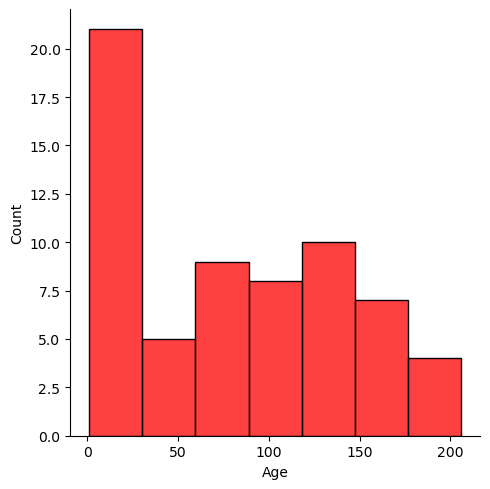

In [11]:
sns.displot(absent['Age'],bins=7,color='red')

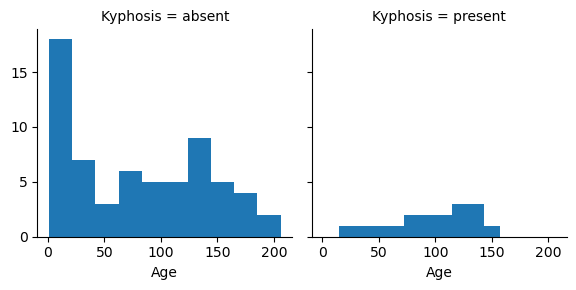

In [12]:
g = sns.FacetGrid(data=df,col='Kyphosis')
g.map(plt.hist,'Age')

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

In [22]:
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.82      0.74      0.78        19
     present       0.38      0.50      0.43         6

    accuracy                           0.68        25
   macro avg       0.60      0.62      0.60        25
weighted avg       0.72      0.68      0.69        25



In [25]:
print(confusion_matrix(y_test,predictions))

[[14  5]
 [ 3  3]]


In [26]:
len(y_test)

25

In [27]:
sum(y_test=='absent')

19

In [28]:
sum(y_test=='present')

6

## Random Forests
Now let's compare the decision tree model to a random forest.

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
rfc_pred = rfc.predict(X_test)

In [31]:
print(confusion_matrix(y_test,rfc_pred))

[[17  2]
 [ 5  1]]


In [32]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



## Logistic Regression model
Now let's compare the decision tree model and random forest to Logistic Regression model.

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
confusion_matrix(y_test,predictions)

array([[17,  2],
       [ 5,  1]], dtype=int64)

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25

